# Analysis Copula Models

In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import pandas as pd
import platform
import pyvinecopulib as pv
import random
import seaborn as sns
from sqlalchemy import create_engine
import sys

date_format = "%Y-%m-%d"

In [2]:
my_os = platform.system()
print("OS in my system : ",my_os)

if my_os == "Windows":
    path = str(pathlib.Path().absolute()) + '\\'
    slash = '\\'
else:
    path = str(pathlib.Path().absolute()) + '/'
    slash = '/'
    
copula_path = path.replace('2_eda', '1_data_collection') + 'data_artifacts' + slash + 'copulas'

OS in my system :  Windows


## Copula Target
### SPX Eikon

In [3]:
e_target_spx = pd.read_excel(copula_path + slash + '1_3_18_e_target_spx.xlsx')
e_target_spx = e_target_spx.drop(columns=['Unnamed: 0'])

e_target_spx['family'] = e_target_spx['family'].replace('BicopFamily.clayton', 'clayton')
e_target_spx['family'] = e_target_spx['family'].replace('BicopFamily.gaussian', 'gaussian')
e_target_spx['family'] = e_target_spx['family'].replace('BicopFamily.frank', 'frank')
e_target_spx['family'] = e_target_spx['family'].replace('BicopFamily.gumbel', 'gumbel')
e_target_spx['family'] = e_target_spx['family'].replace('BicopFamily.student', 'student')
e_target_spx['family'] = e_target_spx['family'].replace('BicopFamily.indep', 'indep')
e_target_spx['family'] = e_target_spx['family'].replace('BicopFamily.joe', 'joe')

e_target_spx.head()

,symbol,year,family,rotation,tau,parameters
0,A,2000,clayton,0,0.232904,[[0.607237]]
1,A,2001,gaussian,0,0.458727,[[0.65981076]]
2,A,2002,frank,0,0.499681,[[5.73048141]]
3,A,2003,gumbel,180,0.505513,[[2.02229729]]
4,A,2004,frank,0,0.462612,[[5.09499262]]


In [4]:
print('Proportion of zero values:')
print((e_target_spx['tau'] == 0).sum()/(len(e_target_spx)))

Proportion of zero values:
0.12659659114703295


In [5]:
e_target_spx.describe()

,year,rotation,tau
count,47758.000000,47758.000000,47758.000000
mean,2011.770677,51.846392,0.278962
std,5.896392,81.598709,0.165382
min,2000.000000,0.000000,-0.224582
25%,2007.000000,0.000000,0.156176
50%,2013.000000,0.000000,0.294395
75%,2017.000000,180.000000,0.402372
max,2021.000000,270.000000,0.748887


In [6]:
e_target_spx['family'].value_counts()/len(e_target_spx)

gumbel      0.322627
gaussian    0.184137
student     0.163638
frank       0.132836
indep       0.126597
clayton     0.039386
joe         0.030780
Name: family, dtype: float64

(0.0, 650.0)

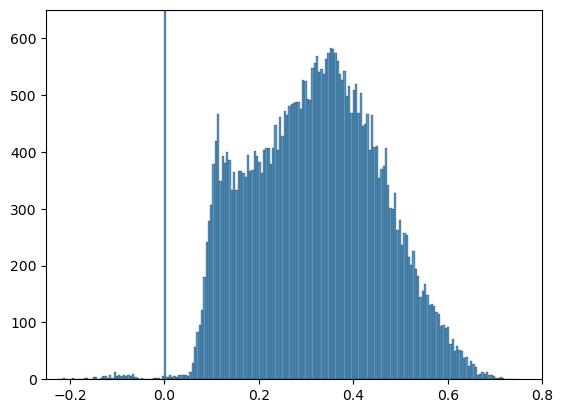

In [7]:
fig = sns.histplot(data = e_target_spx, x = 'tau', bins = 200)
fig.set_xlabel(None)
fig.set_ylabel(None)
plt.xlim(-0.25,0.8)
plt.ylim(0,650)

### SPX Kaggle

In [8]:
k_target_spx = pd.read_excel(copula_path + slash + '1_4_2_k_target_spx.xlsx')
k_target_spx = k_target_spx.drop(columns=['Unnamed: 0'])

k_target_spx['family'] = k_target_spx['family'].replace('BicopFamily.clayton', 'clayton')
k_target_spx['family'] = k_target_spx['family'].replace('BicopFamily.gaussian', 'gaussian')
k_target_spx['family'] = k_target_spx['family'].replace('BicopFamily.frank', 'frank')
k_target_spx['family'] = k_target_spx['family'].replace('BicopFamily.gumbel', 'gumbel')
k_target_spx['family'] = k_target_spx['family'].replace('BicopFamily.student', 'student')
k_target_spx['family'] = k_target_spx['family'].replace('BicopFamily.indep', 'indep')
k_target_spx['family'] = k_target_spx['family'].replace('BicopFamily.joe', 'joe')

k_target_spx.head()

,symbol,year,family,rotation,tau,parameters
0,A,2000,clayton,0,0.226182,[[0.58458702]]
1,A,2001,gaussian,0,0.458499,[[0.65954144]]
2,A,2002,frank,0,0.496933,[[5.68081128]]
3,A,2003,gumbel,180,0.502051,[[2.00823808]]
4,A,2004,frank,0,0.462612,[[5.09499262]]


In [9]:
print('Proportion of zero values:')
print((k_target_spx['tau'] == 0).sum()/(len(k_target_spx)))

Proportion of zero values:
0.159207432250106


In [10]:
k_target_spx.describe()

,year,rotation,tau
count,51882.000000,51882.000000,51882.000000
mean,2011.597124,49.999422,0.266052
std,6.016610,80.685979,0.169825
min,2000.000000,0.000000,-0.192192
25%,2007.000000,0.000000,0.134940
50%,2012.000000,0.000000,0.281559
75%,2017.000000,180.000000,0.394536
max,2021.000000,270.000000,0.748887


In [11]:
k_target_spx['family'].value_counts()/len(k_target_spx)

gumbel      0.310801
gaussian    0.174511
indep       0.159207
student     0.158783
frank       0.128368
clayton     0.037277
joe         0.031051
Name: family, dtype: float64

(0.0, 650.0)

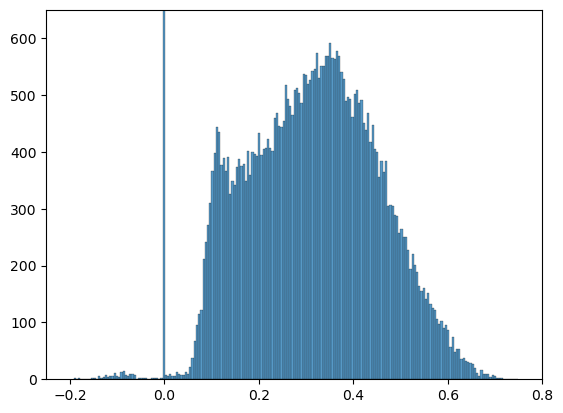

In [12]:
fig = sns.histplot(data = k_target_spx, x = 'tau', bins = 200)
fig.set_xlabel(None)
fig.set_ylabel(None)
plt.xlim(-0.25,0.8)
plt.ylim(0,650)

### NDX Eikon

In [13]:
e_target_ndx = pd.read_excel(copula_path + slash + '1_3_21_e_target_ndx.xlsx')
e_target_ndx = e_target_ndx.drop(columns=['Unnamed: 0'])

e_target_ndx['family'] = e_target_ndx['family'].replace('BicopFamily.clayton', 'clayton')
e_target_ndx['family'] = e_target_ndx['family'].replace('BicopFamily.gaussian', 'gaussian')
e_target_ndx['family'] = e_target_ndx['family'].replace('BicopFamily.frank', 'frank')
e_target_ndx['family'] = e_target_ndx['family'].replace('BicopFamily.gumbel', 'gumbel')
e_target_ndx['family'] = e_target_ndx['family'].replace('BicopFamily.student', 'student')
e_target_ndx['family'] = e_target_ndx['family'].replace('BicopFamily.indep', 'indep')
e_target_ndx['family'] = e_target_ndx['family'].replace('BicopFamily.joe', 'joe')

e_target_ndx.head()

,symbol,year,family,rotation,tau,parameters
0,A,2000,gaussian,0,0.308815,[[0.46628407]]
1,A,2001,gaussian,0,0.493758,[[0.70014014]]
2,A,2002,frank,0,0.504254,[[5.81412755]]
3,A,2003,gumbel,180,0.536304,[[2.15658535]]
4,A,2004,student,0,0.505551,[[0.71324581]\n [6.37502355]]


In [14]:
print('Proportion of zero values:')
print((e_target_ndx['tau'] == 0).sum()/(len(e_target_ndx)))

Proportion of zero values:
0.14956656476401858


In [15]:
e_target_ndx.describe()

,year,rotation,tau
count,47758.000000,47758.000000,47758.000000
mean,2011.770677,52.884752,0.246494
std,5.896392,82.087592,0.154931
min,2000.000000,0.000000,-0.204601
25%,2007.000000,0.000000,0.132789
50%,2013.000000,0.000000,0.257002
75%,2017.000000,180.000000,0.360593
max,2021.000000,270.000000,0.765735


In [16]:
e_target_ndx['family'].value_counts()/len(e_target_ndx)

gumbel      0.324490
gaussian    0.174442
indep       0.149567
student     0.139181
frank       0.130407
clayton     0.042171
joe         0.039742
Name: family, dtype: float64

(0.0, 650.0)

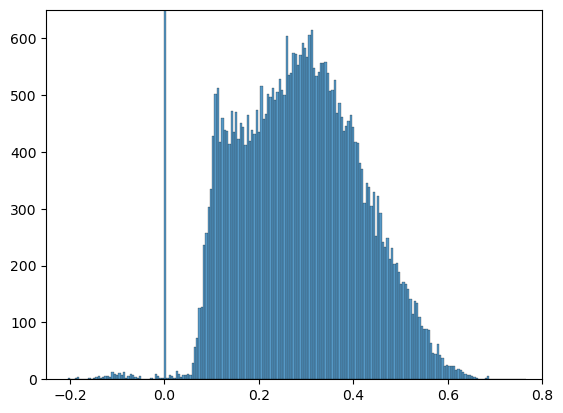

In [17]:
fig = sns.histplot(data = e_target_ndx, x = 'tau', bins = 200)
fig.set_xlabel(None)
fig.set_ylabel(None)
plt.xlim(-0.25,0.8)
plt.ylim(0,650)

### NDX Kaggle

In [18]:
k_target_ndx = pd.read_excel(copula_path + slash + '1_4_7_k_target_ndx.xlsx')
k_target_ndx = k_target_ndx.drop(columns=['Unnamed: 0'])

k_target_ndx['family'] = k_target_ndx['family'].replace('BicopFamily.clayton', 'clayton')
k_target_ndx['family'] = k_target_ndx['family'].replace('BicopFamily.gaussian', 'gaussian')
k_target_ndx['family'] = k_target_ndx['family'].replace('BicopFamily.frank', 'frank')
k_target_ndx['family'] = k_target_ndx['family'].replace('BicopFamily.gumbel', 'gumbel')
k_target_ndx['family'] = k_target_ndx['family'].replace('BicopFamily.student', 'student')
k_target_ndx['family'] = k_target_ndx['family'].replace('BicopFamily.indep', 'indep')
k_target_ndx['family'] = k_target_ndx['family'].replace('BicopFamily.joe', 'joe')

k_target_ndx.head()

,symbol,year,family,rotation,tau,parameters
0,A,2000,gumbel,180,0.298537,[[1.42559096]]
1,A,2001,gaussian,0,0.508021,[[0.7159597]]
2,A,2002,frank,0,0.514677,[[6.00959638]]
3,A,2003,gumbel,180,0.549052,[[2.21754927]]
4,A,2004,frank,0,0.530577,[[6.32157839]]


In [19]:
print('Proportion of zero values:')
print((k_target_ndx['tau'] == 0).sum()/(len(k_target_ndx)))

Proportion of zero values:
0.1658571373501407


In [20]:
k_target_ndx.describe()

,year,rotation,tau
count,51882.000000,51882.000000,51882.000000
mean,2011.597124,49.945646,0.256018
std,6.016610,80.677683,0.165678
min,2000.000000,0.000000,-0.192931
25%,2007.000000,0.000000,0.129617
50%,2012.000000,0.000000,0.270907
75%,2017.000000,180.000000,0.380047
max,2021.000000,270.000000,0.735070


In [21]:
k_target_ndx['family'].value_counts()/len(k_target_ndx)

gumbel      0.310859
indep       0.165857
gaussian    0.153907
student     0.153213
frank       0.146313
clayton     0.037296
joe         0.032555
Name: family, dtype: float64

(0.0, 650.0)

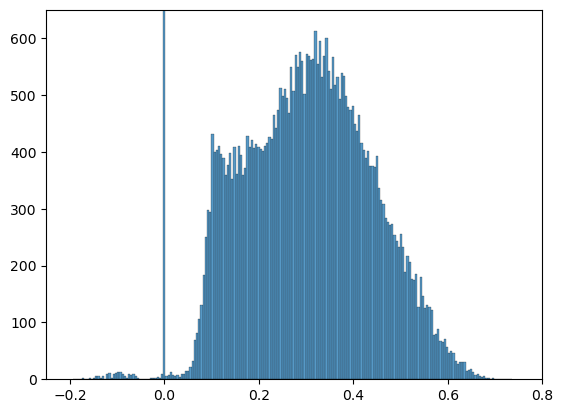

In [22]:
fig = sns.histplot(data = k_target_ndx, x = 'tau', bins = 200)
fig.set_xlabel(None)
fig.set_ylabel(None)
plt.xlim(-0.25,0.8)
plt.ylim(0,650)

### Family Distribution

In [23]:
fam_dist_target = {
    "spx_eikon": e_target_spx['family'].value_counts(),
    "spx_kaggle": k_target_spx['family'].value_counts(),
    "ndx_eikon": e_target_ndx['family'].value_counts(),
    "ndx_kaggle": k_target_ndx['family'].value_counts()
}

fam_dist_target = pd.DataFrame(fam_dist_target)

<AxesSubplot:>

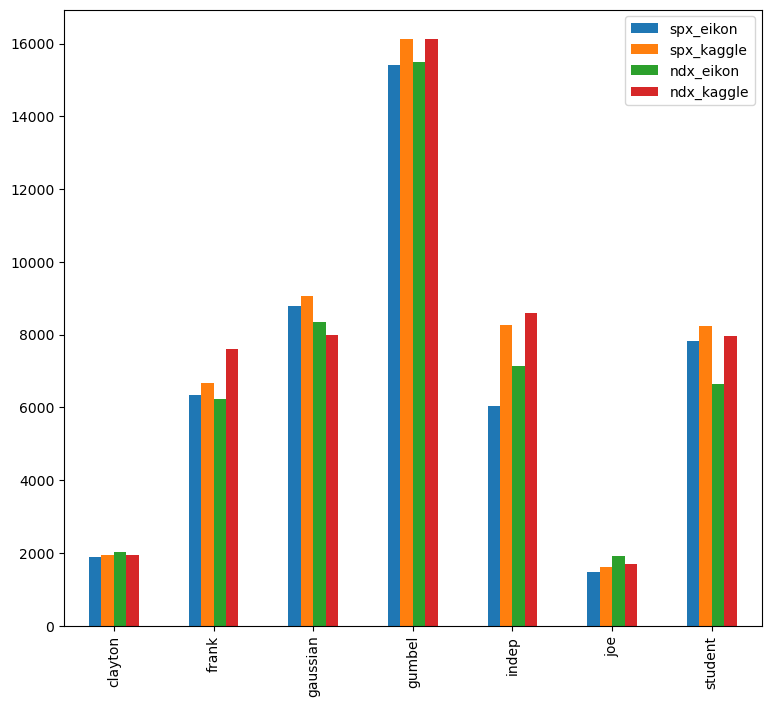

In [24]:
fam_dist_target.plot(y=["spx_eikon", "spx_kaggle", "ndx_eikon", "ndx_kaggle"], kind="bar", figsize=(9, 8))

## ----------------------------------------------------------------------------------------------
## Copula Feature 3 Years Window
### SPX Eikon

In [25]:
e_cop_3y_spx = pd.read_excel(copula_path + slash + '1_5_0_e_cop_3y_spx.xlsx')
e_cop_3y_spx = e_cop_3y_spx.drop(columns=['Unnamed: 0'])

e_cop_3y_spx['family'] = e_cop_3y_spx['family'].replace('BicopFamily.clayton', 'clayton')
e_cop_3y_spx['family'] = e_cop_3y_spx['family'].replace('BicopFamily.gaussian', 'gaussian')
e_cop_3y_spx['family'] = e_cop_3y_spx['family'].replace('BicopFamily.frank', 'frank')
e_cop_3y_spx['family'] = e_cop_3y_spx['family'].replace('BicopFamily.gumbel', 'gumbel')
e_cop_3y_spx['family'] = e_cop_3y_spx['family'].replace('BicopFamily.student', 'student')
e_cop_3y_spx['family'] = e_cop_3y_spx['family'].replace('BicopFamily.indep', 'indep')
e_cop_3y_spx['family'] = e_cop_3y_spx['family'].replace('BicopFamily.joe', 'joe')

e_cop_3y_spx.head()

,symbol,year,family,rotation,tau,parameters
0,A,2000,clayton,0,0.232904,[[0.607237]]
1,A,2001,gaussian,0,0.344151,[[0.51464281]]
2,A,2002,frank,0,0.391592,[[4.04635815]]
3,A,2003,student,0,0.471121,[[0.67431406]\n [8.49320555]]
4,A,2004,student,0,0.485946,[[0.6913253 ]\n [6.38771666]]


In [26]:
print('Proportion of zero values:')
print((e_cop_3y_spx['tau'] == 0).sum()/(len(e_cop_3y_spx)))

Proportion of zero values:
0.107188630880579


In [27]:
e_cop_3y_spx.describe()

,year,rotation,tau
count,53056.000000,53056.000000,53056.000000
mean,2012.116877,35.931469,0.257899
std,6.099199,72.048891,0.159994
min,2000.000000,0.000000,-0.144289
25%,2007.000000,0.000000,0.120193
50%,2013.000000,0.000000,0.271245
75%,2017.000000,0.000000,0.382383
max,2021.000000,270.000000,0.696102


In [28]:
e_cop_3y_spx['family'].value_counts()/len(e_cop_3y_spx)

student     0.430489
gumbel      0.202315
frank       0.108282
indep       0.107189
gaussian    0.103984
clayton     0.027895
joe         0.019847
Name: family, dtype: float64

(0.0, 650.0)

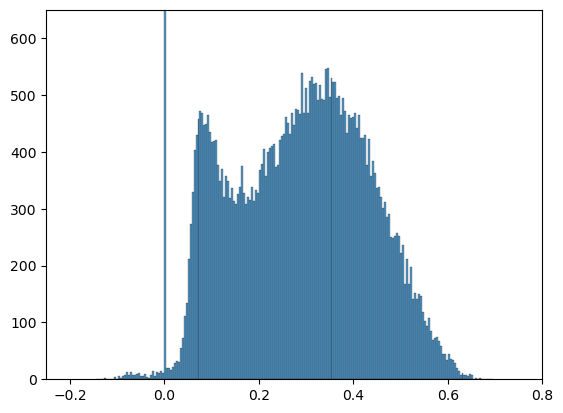

In [29]:
fig = sns.histplot(data = e_cop_3y_spx, x = 'tau', bins = 200)
fig.set_xlabel(None)
fig.set_ylabel(None)
plt.xlim(-0.25,0.8)
plt.ylim(0,650)

### SPX Kaggle

In [30]:
k_cop_3y_spx = pd.read_excel(copula_path + slash + '1_6_17_k_cop_3y_spx.xlsx')
k_cop_3y_spx = k_cop_3y_spx.drop(columns=['Unnamed: 0'])

k_cop_3y_spx['family'] = k_cop_3y_spx['family'].replace('BicopFamily.clayton', 'clayton')
k_cop_3y_spx['family'] = k_cop_3y_spx['family'].replace('BicopFamily.gaussian', 'gaussian')
k_cop_3y_spx['family'] = k_cop_3y_spx['family'].replace('BicopFamily.frank', 'frank')
k_cop_3y_spx['family'] = k_cop_3y_spx['family'].replace('BicopFamily.gumbel', 'gumbel')
k_cop_3y_spx['family'] = k_cop_3y_spx['family'].replace('BicopFamily.student', 'student')
k_cop_3y_spx['family'] = k_cop_3y_spx['family'].replace('BicopFamily.indep', 'indep')
k_cop_3y_spx['family'] = k_cop_3y_spx['family'].replace('BicopFamily.joe', 'joe')

k_cop_3y_spx.head()

,symbol,year,family,rotation,tau,parameters
0,A,2000,clayton,0,0.226182,[[0.58458702]]
1,A,2001,frank,0,0.348072,[[3.48502067]]
2,A,2002,frank,0,0.388767,[[4.00830203]]
3,A,2003,student,0,0.469600,[[0.67254744]\n [8.7298173 ]]
4,A,2004,student,0,0.483837,[[0.68892877]\n [6.55711326]]


In [31]:
print('Proportion of zero values:')
print((k_cop_3y_spx['tau'] == 0).sum()/(len(k_cop_3y_spx)))

Proportion of zero values:
0.10191669073058042


In [32]:
k_cop_3y_spx.describe()

,year,rotation,tau
count,55408.000000,55408.000000,55408.000000
mean,2012.183818,37.203292,0.257392
std,6.246951,72.937734,0.157093
min,2000.000000,0.000000,-0.170143
25%,2007.000000,0.000000,0.125316
50%,2013.000000,0.000000,0.268720
75%,2018.000000,0.000000,0.378432
max,2021.000000,270.000000,0.693945


In [33]:
k_cop_3y_spx['family'].value_counts()/len(k_cop_3y_spx)

student     0.429685
gumbel      0.207750
frank       0.107782
gaussian    0.105382
indep       0.101917
clayton     0.027343
joe         0.020141
Name: family, dtype: float64

(0.0, 650.0)

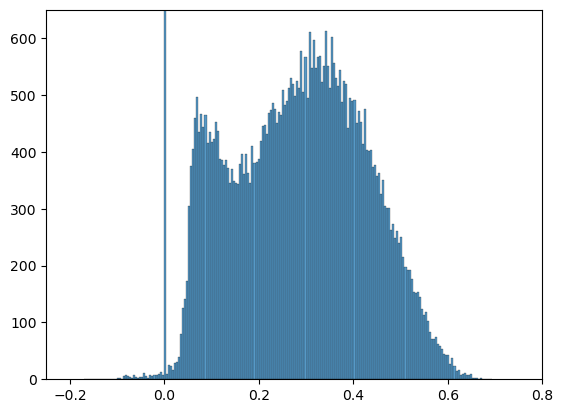

In [34]:
fig = sns.histplot(data = k_cop_3y_spx, x = 'tau', bins = 200)
fig.set_xlabel(None)
fig.set_ylabel(None)
plt.xlim(-0.25,0.8)
plt.ylim(0,650)

### NDX Eikon

In [35]:
e_cop_3y_ndx = pd.read_excel(copula_path + slash + '1_5_4_e_cop_3y_ndx.xlsx')
e_cop_3y_ndx = e_cop_3y_ndx.drop(columns=['Unnamed: 0'])

e_cop_3y_ndx['family'] = e_cop_3y_ndx['family'].replace('BicopFamily.clayton', 'clayton')
e_cop_3y_ndx['family'] = e_cop_3y_ndx['family'].replace('BicopFamily.gaussian', 'gaussian')
e_cop_3y_ndx['family'] = e_cop_3y_ndx['family'].replace('BicopFamily.frank', 'frank')
e_cop_3y_ndx['family'] = e_cop_3y_ndx['family'].replace('BicopFamily.gumbel', 'gumbel')
e_cop_3y_ndx['family'] = e_cop_3y_ndx['family'].replace('BicopFamily.student', 'student')
e_cop_3y_ndx['family'] = e_cop_3y_ndx['family'].replace('BicopFamily.indep', 'indep')
e_cop_3y_ndx['family'] = e_cop_3y_ndx['family'].replace('BicopFamily.joe', 'joe')

e_cop_3y_ndx.head()

,symbol,year,family,rotation,tau,parameters
0,A,2000,gaussian,0,0.308815,[[0.46628407]]
1,A,2001,gaussian,0,0.392712,[[0.57848526]]
2,A,2002,gaussian,0,0.410796,[[0.60141908]]
3,A,2003,student,0,0.500286,[[0.70742489]\n [4.98073163]]
4,A,2004,student,0,0.512234,[[0.72056408]\n [4.39151455]]


In [36]:
print('Proportion of zero values:')
print((e_cop_3y_ndx['tau'] == 0).sum()/(len(e_cop_3y_ndx)))

Proportion of zero values:
0.1204576296743064


In [37]:
e_cop_3y_ndx.describe()

,year,rotation,tau
count,53056.000000,53056.000000,53056.000000
mean,2012.116877,39.802473,0.228409
std,6.099199,74.779118,0.146936
min,2000.000000,0.000000,-0.127874
25%,2007.000000,0.000000,0.107419
50%,2013.000000,0.000000,0.231175
75%,2017.000000,0.000000,0.341822
max,2021.000000,270.000000,0.691751


In [38]:
e_cop_3y_ndx['family'].value_counts()/len(e_cop_3y_ndx)

student     0.388231
gumbel      0.227703
indep       0.120458
frank       0.113710
gaussian    0.095936
clayton     0.029422
joe         0.024540
Name: family, dtype: float64

(0.0, 650.0)

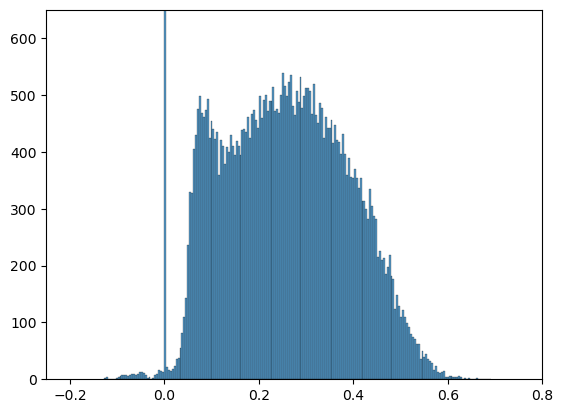

In [39]:
fig = sns.histplot(data = e_cop_3y_ndx, x = 'tau', bins = 200)
fig.set_xlabel(None)
fig.set_ylabel(None)
plt.xlim(-0.25,0.8)
plt.ylim(0,650)

### NDX Kaggle

In [40]:
k_cop_3y_ndx = pd.read_excel(copula_path + slash + '1_7_1_k_cop_3y_ndx.xlsx')
k_cop_3y_ndx = k_cop_3y_ndx.drop(columns=['Unnamed: 0'])

k_cop_3y_ndx['family'] = k_cop_3y_ndx['family'].replace('BicopFamily.clayton', 'clayton')
k_cop_3y_ndx['family'] = k_cop_3y_ndx['family'].replace('BicopFamily.gaussian', 'gaussian')
k_cop_3y_ndx['family'] = k_cop_3y_ndx['family'].replace('BicopFamily.frank', 'frank')
k_cop_3y_ndx['family'] = k_cop_3y_ndx['family'].replace('BicopFamily.gumbel', 'gumbel')
k_cop_3y_ndx['family'] = k_cop_3y_ndx['family'].replace('BicopFamily.student', 'student')
k_cop_3y_ndx['family'] = k_cop_3y_ndx['family'].replace('BicopFamily.indep', 'indep')
k_cop_3y_ndx['family'] = k_cop_3y_ndx['family'].replace('BicopFamily.joe', 'joe')

k_cop_3y_ndx.head()

,symbol,year,family,rotation,tau,parameters
0,A,2000,gumbel,180,0.298537,[[1.42559096]]
1,A,2001,frank,0,0.411939,[[4.3278801]]
2,A,2002,student,0,0.428672,[[0.62361315]\n [6.76863677]]
3,A,2003,student,0,0.515953,[[0.72460191]\n [5.25566984]]
4,A,2004,student,0,0.522954,[[0.73213759]\n [4.87241995]]


In [41]:
print('Proportion of zero values:')
print((k_cop_3y_ndx['tau'] == 0).sum()/(len(k_cop_3y_ndx)))

Proportion of zero values:
0.103956107421311


In [42]:
k_cop_3y_ndx.describe()

,year,rotation,tau
count,55408.000000,55408.000000,55408.000000
mean,2012.183818,37.986211,0.248212
std,6.246951,73.525955,0.152485
min,2000.000000,0.000000,-0.177880
25%,2007.000000,0.000000,0.122916
50%,2013.000000,0.000000,0.254935
75%,2018.000000,0.000000,0.364870
max,2021.000000,270.000000,0.661840


In [43]:
k_cop_3y_ndx['family'].value_counts()/len(k_cop_3y_ndx)

student     0.412431
gumbel      0.216178
frank       0.138500
indep       0.103956
gaussian    0.083075
clayton     0.025592
joe         0.020268
Name: family, dtype: float64

(0.0, 650.0)

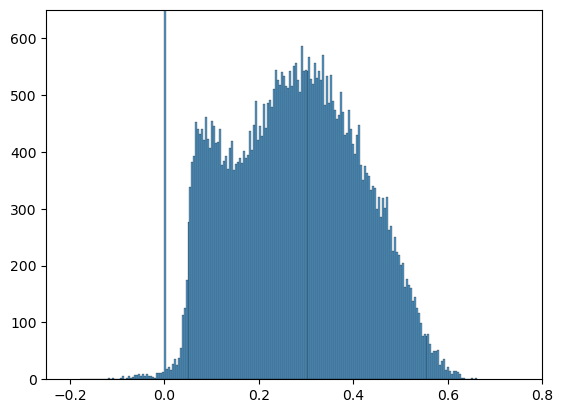

In [44]:
fig = sns.histplot(data = k_cop_3y_ndx, x = 'tau', bins = 200)
fig.set_xlabel(None)
fig.set_ylabel(None)
plt.xlim(-0.25,0.8)
plt.ylim(0,650)

### Family Distribution

In [45]:
fam_dist_cop_3y = {
    "spx_eikon": e_cop_3y_spx['family'].value_counts(),
    "spx_kaggle": k_cop_3y_spx['family'].value_counts(),
    "ndx_eikon": e_cop_3y_ndx['family'].value_counts(),
    "ndx_kaggle": k_cop_3y_ndx['family'].value_counts()
}

fam_dist_cop_3y = pd.DataFrame(fam_dist_cop_3y)

<AxesSubplot:>

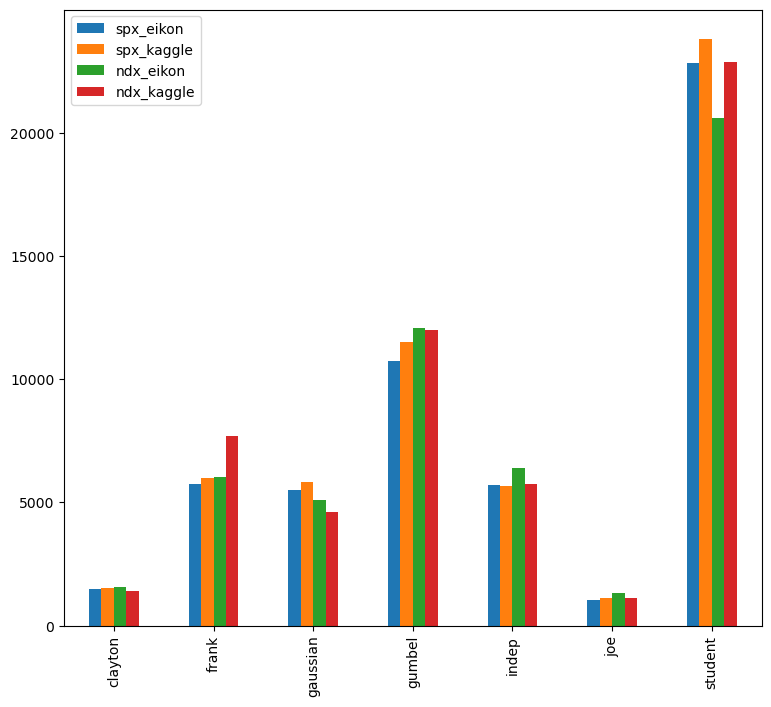

In [46]:
fam_dist_cop_3y.plot(y=["spx_eikon", "spx_kaggle", "ndx_eikon", "ndx_kaggle"], kind="bar", figsize=(9, 8))

## ----------------------------------------------------------------------------------------------
## Copula Feature 5 Years Window
### SPX Eikon

In [47]:
e_cop_5y_spx = pd.read_excel(copula_path + slash + '1_5_10_e_cop_5y_spx.xlsx')
e_cop_5y_spx = e_cop_5y_spx.drop(columns=['Unnamed: 0'])

e_cop_5y_spx['family'] = e_cop_5y_spx['family'].replace('BicopFamily.clayton', 'clayton')
e_cop_5y_spx['family'] = e_cop_5y_spx['family'].replace('BicopFamily.gaussian', 'gaussian')
e_cop_5y_spx['family'] = e_cop_5y_spx['family'].replace('BicopFamily.frank', 'frank')
e_cop_5y_spx['family'] = e_cop_5y_spx['family'].replace('BicopFamily.gumbel', 'gumbel')
e_cop_5y_spx['family'] = e_cop_5y_spx['family'].replace('BicopFamily.student', 'student')
e_cop_5y_spx['family'] = e_cop_5y_spx['family'].replace('BicopFamily.indep', 'indep')
e_cop_5y_spx['family'] = e_cop_5y_spx['family'].replace('BicopFamily.joe', 'joe')

e_cop_5y_spx.head()

,symbol,year,family,rotation,tau,parameters
0,A,2000,clayton,0,0.232904,[[0.607237]]
1,A,2001,gaussian,0,0.344151,[[0.51464281]]
2,A,2002,frank,0,0.391592,[[4.04635815]]
3,A,2003,frank,0,0.417179,[[4.40261248]]
4,A,2004,frank,0,0.425203,[[4.51897345]]


In [48]:
print('Proportion of zero values:')
print((e_cop_5y_spx['tau'] == 0).sum()/(len(e_cop_5y_spx)))

Proportion of zero values:
0.09018547720958174


In [49]:
e_cop_5y_spx.describe()

,year,rotation,tau
count,53268.000000,53268.000000,53268.000000
mean,2012.121367,27.986033,0.252283
std,6.096526,65.316221,0.156976
min,2000.000000,0.000000,-0.119207
25%,2007.000000,0.000000,0.113962
50%,2013.000000,0.000000,0.262205
75%,2017.000000,0.000000,0.378014
max,2021.000000,270.000000,0.674719


In [50]:
e_cop_5y_spx['family'].value_counts()/len(e_cop_5y_spx)

student     0.551588
gumbel      0.155741
indep       0.090185
frank       0.089059
gaussian    0.069854
clayton     0.026583
joe         0.016990
Name: family, dtype: float64

(0.0, 650.0)

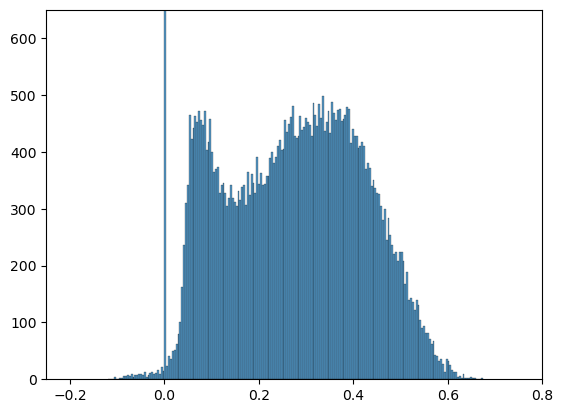

In [51]:
fig = sns.histplot(data = e_cop_5y_spx, x = 'tau', bins = 200)
fig.set_xlabel(None)
fig.set_ylabel(None)
plt.xlim(-0.25,0.8)
plt.ylim(0,650)

### SPX Kaggle

In [52]:
k_cop_5y_spx = pd.read_excel(copula_path + slash + '1_7_12_k_cop_5y_spx.xlsx')
k_cop_5y_spx = k_cop_5y_spx.drop(columns=['Unnamed: 0'])

k_cop_5y_spx['family'] = k_cop_5y_spx['family'].replace('BicopFamily.clayton', 'clayton')
k_cop_5y_spx['family'] = k_cop_5y_spx['family'].replace('BicopFamily.gaussian', 'gaussian')
k_cop_5y_spx['family'] = k_cop_5y_spx['family'].replace('BicopFamily.frank', 'frank')
k_cop_5y_spx['family'] = k_cop_5y_spx['family'].replace('BicopFamily.gumbel', 'gumbel')
k_cop_5y_spx['family'] = k_cop_5y_spx['family'].replace('BicopFamily.student', 'student')
k_cop_5y_spx['family'] = k_cop_5y_spx['family'].replace('BicopFamily.indep', 'indep')
k_cop_5y_spx['family'] = k_cop_5y_spx['family'].replace('BicopFamily.joe', 'joe')

k_cop_5y_spx.head()

,symbol,year,family,rotation,tau,parameters
0,A,2000,clayton,0,0.226182,[[0.58458702]]
1,A,2001,frank,0,0.348072,[[3.48502067]]
2,A,2002,frank,0,0.388767,[[4.00830203]]
3,A,2003,frank,0,0.414763,[[4.36803208]]
4,A,2004,frank,0,0.423255,[[4.49049845]]


In [53]:
print('Proportion of zero values:')
print((k_cop_5y_spx['tau'] == 0).sum()/(len(k_cop_5y_spx)))

Proportion of zero values:
0.08389177114858049


In [54]:
k_cop_5y_spx.describe()

,year,rotation,tau
count,55512.000000,55512.000000,55512.000000
mean,2012.197075,29.883268,0.251260
std,6.250645,67.006367,0.153145
min,2000.000000,0.000000,-0.170143
25%,2007.000000,0.000000,0.120207
50%,2013.000000,0.000000,0.258732
75%,2018.000000,0.000000,0.372359
max,2021.000000,270.000000,0.671576


In [55]:
k_cop_5y_spx['family'].value_counts()/len(k_cop_5y_spx)

student     0.551196
gumbel      0.163298
frank       0.086702
indep       0.083892
gaussian    0.072741
clayton     0.024499
joe         0.017672
Name: family, dtype: float64

(0.0, 650.0)

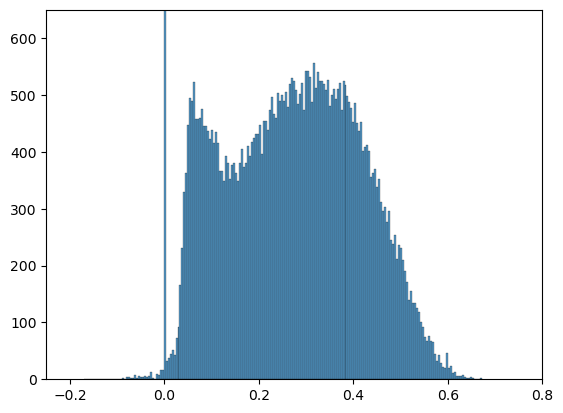

In [56]:
fig = sns.histplot(data = k_cop_5y_spx, x = 'tau', bins = 200)
fig.set_xlabel(None)
fig.set_ylabel(None)
plt.xlim(-0.25,0.8)
plt.ylim(0,650)

### NDX Eikon

In [57]:
e_cop_5y_ndx = pd.read_excel(copula_path + slash + '1_5_17_e_cop_5y_ndx.xlsx')
e_cop_5y_ndx = e_cop_5y_ndx.drop(columns=['Unnamed: 0'])

e_cop_5y_ndx['family'] = e_cop_5y_ndx['family'].replace('BicopFamily.clayton', 'clayton')
e_cop_5y_ndx['family'] = e_cop_5y_ndx['family'].replace('BicopFamily.gaussian', 'gaussian')
e_cop_5y_ndx['family'] = e_cop_5y_ndx['family'].replace('BicopFamily.frank', 'frank')
e_cop_5y_ndx['family'] = e_cop_5y_ndx['family'].replace('BicopFamily.gumbel', 'gumbel')
e_cop_5y_ndx['family'] = e_cop_5y_ndx['family'].replace('BicopFamily.student', 'student')
e_cop_5y_ndx['family'] = e_cop_5y_ndx['family'].replace('BicopFamily.indep', 'indep')
e_cop_5y_ndx['family'] = e_cop_5y_ndx['family'].replace('BicopFamily.joe', 'joe')

e_cop_5y_ndx.head()

,symbol,year,family,rotation,tau,parameters
0,A,2000,gaussian,0,0.308815,[[0.46628407]]
1,A,2001,gaussian,0,0.392712,[[0.57848526]]
2,A,2002,gaussian,0,0.410796,[[0.60141908]]
3,A,2003,student,0,0.435484,[[0.63194212]\n [6.01687797]]
4,A,2004,student,0,0.446790,[[0.64560518]\n [4.50773278]]


In [58]:
print('Proportion of zero values:')
print((e_cop_5y_ndx['tau'] == 0).sum()/(len(e_cop_5y_ndx)))

Proportion of zero values:
0.10250056318990763


In [59]:
e_cop_5y_ndx.describe()

,year,rotation,tau
count,53268.000000,53268.000000,53268.000000
mean,2012.121367,30.824510,0.224415
std,6.096526,67.871637,0.144473
min,2000.000000,0.000000,-0.122992
25%,2007.000000,0.000000,0.101593
50%,2013.000000,0.000000,0.225888
75%,2017.000000,0.000000,0.339517
max,2021.000000,270.000000,0.655846


In [60]:
e_cop_5y_ndx['family'].value_counts()/len(e_cop_5y_ndx)

student     0.519993
gumbel      0.175152
indep       0.102501
frank       0.095386
gaussian    0.060524
clayton     0.027728
joe         0.018717
Name: family, dtype: float64

(0.0, 650.0)

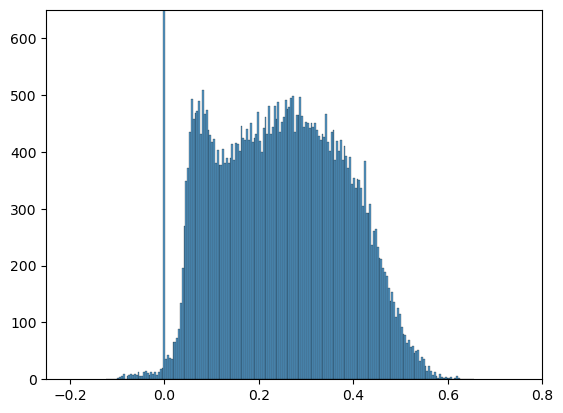

In [61]:
fig = sns.histplot(data = e_cop_5y_ndx, x = 'tau', bins = 200)
fig.set_xlabel(None)
fig.set_ylabel(None)
plt.xlim(-0.25,0.8)
plt.ylim(0,650)

### NDX Kaggle

In [62]:
k_cop_5y_ndx = pd.read_excel(copula_path + slash + '1_7_22_k_cop_5y_ndx.xlsx')
k_cop_5y_ndx = k_cop_5y_ndx.drop(columns=['Unnamed: 0'])

k_cop_5y_ndx['family'] = k_cop_5y_ndx['family'].replace('BicopFamily.clayton', 'clayton')
k_cop_5y_ndx['family'] = k_cop_5y_ndx['family'].replace('BicopFamily.gaussian', 'gaussian')
k_cop_5y_ndx['family'] = k_cop_5y_ndx['family'].replace('BicopFamily.frank', 'frank')
k_cop_5y_ndx['family'] = k_cop_5y_ndx['family'].replace('BicopFamily.gumbel', 'gumbel')
k_cop_5y_ndx['family'] = k_cop_5y_ndx['family'].replace('BicopFamily.student', 'student')
k_cop_5y_ndx['family'] = k_cop_5y_ndx['family'].replace('BicopFamily.indep', 'indep')
k_cop_5y_ndx['family'] = k_cop_5y_ndx['family'].replace('BicopFamily.joe', 'joe')

k_cop_5y_ndx.head()

,symbol,year,family,rotation,tau,parameters
0,A,2000,gumbel,180,0.298537,[[1.42559096]]
1,A,2001,frank,0,0.411939,[[4.3278801]]
2,A,2002,student,0,0.428672,[[0.62361315]\n [6.76863677]]
3,A,2003,student,0,0.451740,[[0.65152345]\n [4.76572482]]
4,A,2004,student,0,0.463937,[[0.66593775]\n [3.98047731]]


In [63]:
print('Proportion of zero values:')
print((k_cop_5y_ndx['tau'] == 0).sum()/(len(k_cop_5y_ndx)))

Proportion of zero values:
0.0848465196714224


In [64]:
k_cop_5y_ndx.describe()

,year,rotation,tau
count,55512.000000,55512.000000,55512.000000
mean,2012.197075,29.855707,0.243121
std,6.250645,66.997965,0.148803
min,2000.000000,0.000000,-0.177880
25%,2007.000000,0.000000,0.117750
50%,2013.000000,0.000000,0.247353
75%,2018.000000,0.000000,0.360323
max,2021.000000,270.000000,0.627053


In [65]:
k_cop_5y_ndx['family'].value_counts()/len(k_cop_5y_ndx)

student     0.541072
gumbel      0.165892
frank       0.109598
indep       0.084847
gaussian    0.059194
clayton     0.022193
joe         0.017203
Name: family, dtype: float64

(0.0, 650.0)

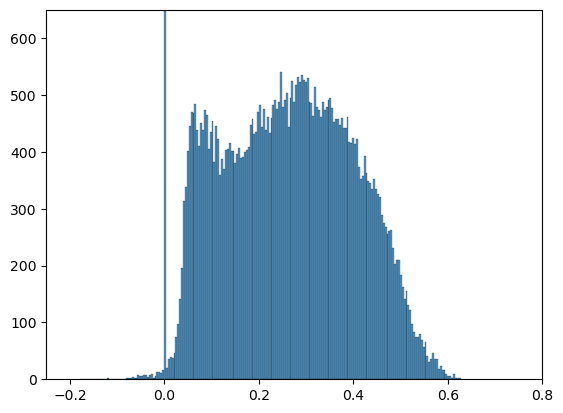

In [66]:
fig = sns.histplot(data = k_cop_5y_ndx, x = 'tau', bins = 200)
fig.set_xlabel(None)
fig.set_ylabel(None)
plt.xlim(-0.25,0.8)
plt.ylim(0,650)

### Family Distribution

In [67]:
fam_dist_cop_5y = {
    "spx_eikon": e_cop_5y_spx['family'].value_counts(),
    "spx_kaggle": k_cop_5y_spx['family'].value_counts(),
    "ndx_eikon": e_cop_5y_ndx['family'].value_counts(),
    "ndx_kaggle": k_cop_5y_ndx['family'].value_counts()
}

fam_dist_cop_5y = pd.DataFrame(fam_dist_cop_5y)

<AxesSubplot:>

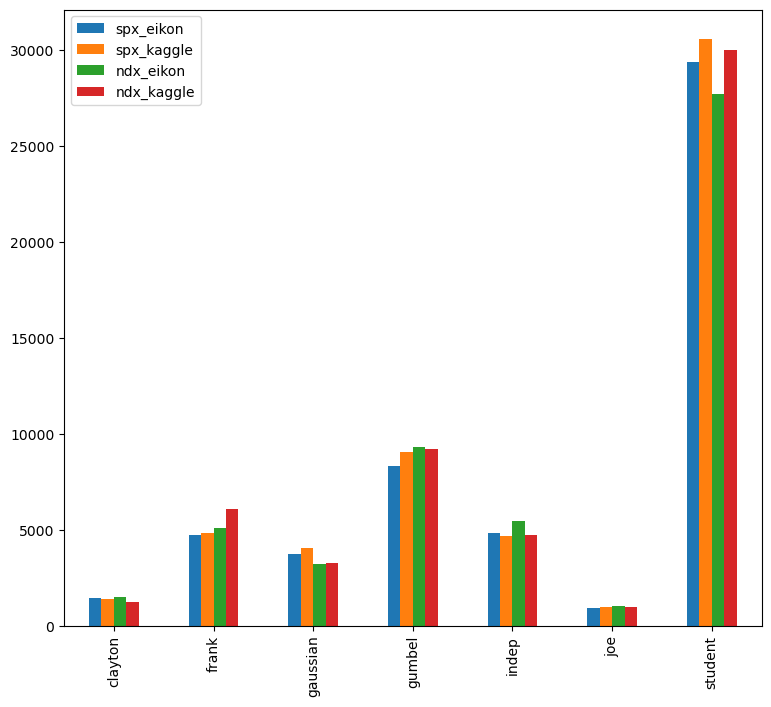

In [68]:
fam_dist_cop_5y.plot(y=["spx_eikon", "spx_kaggle", "ndx_eikon", "ndx_kaggle"], kind="bar", figsize=(9, 8))

## Time Series Means

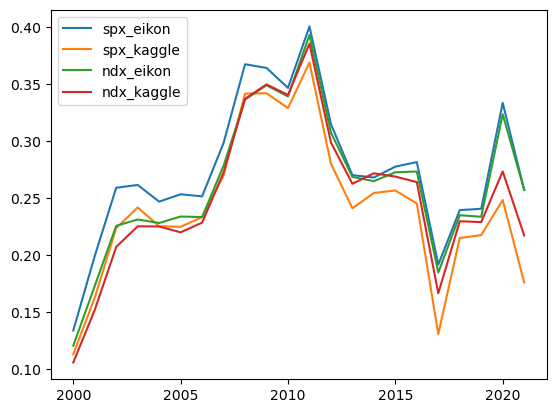

In [69]:
e_spx_tau_ts_means = {}
for year in e_target_spx['year'].unique():
    e_spx_tau_ts_means[year]= e_target_spx[e_target_spx['year'] == year]['tau'].mean()

e_ndx_tau_ts_means = {}
for year in e_target_ndx['year'].unique():
    e_ndx_tau_ts_means[year]= e_target_ndx[e_target_ndx['year'] == year]['tau'].mean()

k_spx_tau_ts_means = {}
for year in k_target_spx['year'].unique():
    k_spx_tau_ts_means[year]= k_target_spx[k_target_spx['year'] == year]['tau'].mean()
    
k_ndx_tau_ts_means = {}
for year in k_target_ndx['year'].unique():
    k_ndx_tau_ts_means[year]= k_target_ndx[k_target_ndx['year'] == year]['tau'].mean()

sns.lineplot(data= e_spx_tau_ts_means)
sns.lineplot(data= e_ndx_tau_ts_means)
sns.lineplot(data= k_spx_tau_ts_means)
sns.lineplot(data= k_ndx_tau_ts_means)
plt.legend(labels=['spx_eikon', 'spx_kaggle', 'ndx_eikon', 'ndx_kaggle'])

